In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Variables
l = 2 # m
m = 1.5 # kg
k = 100 # N/m
b = 0.75
c = 1

# constants
g = 9.81 # m/s^2

# ICs
y_0 = 0.1 # m
dy_0 = 0 # m/s

n = 1000  # number of values in interval.
t_max = 10 # maximum value of interval. Tweak to stop function from blowing up
h = t_max / n # the smaller h is, the more time the code will take to run

In [92]:
# 1st attempt. Only approximated the potentail due to the spring as negligible.
# EOM does not look like a harmonic oscillator but still behaves like one.

time = np.arange(0.0, t_max, h)

def G(x,t): 
	y_d, y = x[0], x[1]

	y_dd = (-2*g*c*y - 4*c**2*y*y_d**2 - 4*b*c**2*y*y_d**2) / (1 + 4*c**2*y**2 + 4*b*c**2*y**2)

	return np.array([y_dd, y_d])

def RK4_step(x, t, dt):
	k1 = G(x,t)
	k2 = G(x+0.5*k1*dt, t+0.5*dt)
	k3 = G(x+0.5*k2*dt, t+0.5*dt)
	k4 = G(x+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

time = np.arange(0.0, t_max, h)

# initial state
x = np.array([dy_0, y_0])   # [velocity, displacement]

y = np.array([])

# time-stepping solution
for t in time:
	x = x + RK4_step(x, t, h) 

	y = np.append(y, x[1])

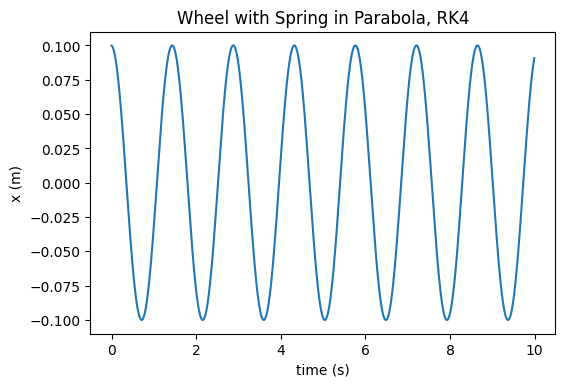

In [93]:
# plotting result for angle
fig = plt.figure(dpi=100)
plt.plot(time, y)
fig.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"x (m)")
plt.title(r"Wheel with Spring in Parabola, RK4")
plt.show()

In [94]:
# 2nd attempt. Add on a approximation of any change in the y direction as negligible.
# In this situation EOM ends up in the form of a harmonic oscillator.
# This behaves similar to the situation above but we see the period of the oscillations is a bit longer with the extra approximations.

time = np.arange(0.0, t_max, h)

def G(x,t): 
	y_d, y = x[0], x[1]

	y_dd = (-2*g*c*y) / (1+b)

	return np.array([y_dd, y_d])

def RK4_step(x, t, dt):
	k1 = G(x,t)
	k2 = G(x+0.5*k1*dt, t+0.5*dt)
	k3 = G(x+0.5*k2*dt, t+0.5*dt)
	k4 = G(x+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

time = np.arange(0.0, t_max, h)

# initial state
x = np.array([dy_0, y_0])   # [velocity, displacement]

y = np.array([])

# time-stepping solution
for t in time:
	x = x + RK4_step(x, t, h) 

	y = np.append(y, x[1])

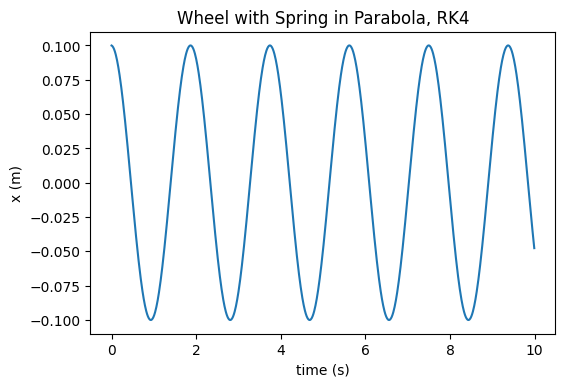

In [95]:
# plotting result for angle
fig2 = plt.figure(dpi=100)
plt.plot(time, y)
fig2.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"x (m)")
plt.title(r"Wheel with Spring in Parabola, RK4")
plt.show()